In [1]:
import rrlyrae
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

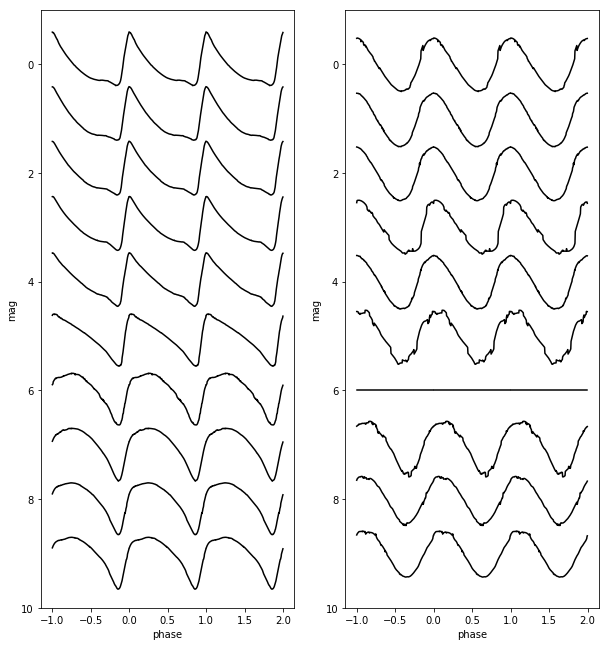

In [2]:
# Plot the template light curve in each band 

bands = np.array(['U', 'B', 'V', 'R', 'I', 'J', 'H', 'K', '[3.6]', '[4.5]'])
fig = plt.figure(figsize=(10,11))
ax = fig.add_subplot(121)
ax.set_xlabel('phase')
ax.set_ylabel('mag')
ax.set_ylim(10,-1)
for ii, band in enumerate(bands):
    rrlyrae.plot_rrlyrae_template(band=band, plt_axes=ax, y_offset=float(ii))
    rrlyrae.plot_rrlyrae_template(band=band, plt_axes=ax, y_offset=float(ii), x_offset=-1.0)
    rrlyrae.plot_rrlyrae_template(band=band, plt_axes=ax, y_offset=float(ii), x_offset=1.0)
    
ax = fig.add_subplot(122)
ax.set_xlabel('phase')
ax.set_ylabel('mag')
ax.set_ylim(10,-1)
for ii, band in enumerate(bands):
    rrlyrae.plot_rrlyrae_template(band=band, plt_axes=ax, y_offset=float(ii), mode='c')
    rrlyrae.plot_rrlyrae_template(band=band, plt_axes=ax, y_offset=float(ii), x_offset=-1.0, mode='c')
    rrlyrae.plot_rrlyrae_template(band=band, plt_axes=ax, y_offset=float(ii), x_offset=1.0, mode='c')

[5558.10942009 5555.19582503 5553.091738   5550.0831631  5556.27959485
 5551.36499453 5557.05035946]


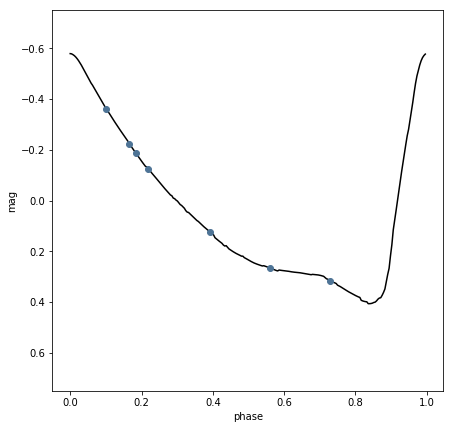

In [2]:
# Test the function that determines the potential phase coverage for given observation times 

times = np.random.uniform(low=5550.0, high=5560.0, size=7)
print times
rrlyrae.simulate_observing_cadence(times, amplitude=1.0, mode='ab')

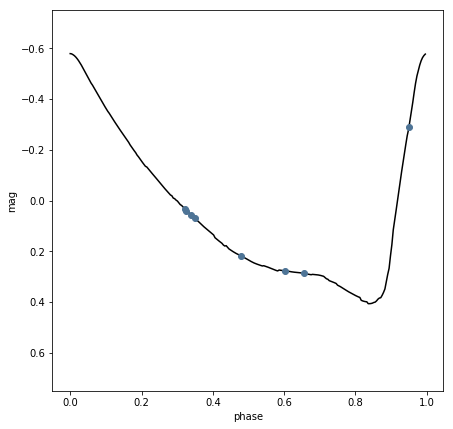

In [5]:
times = np.array([5970.97508, 5971.17472, 5972.24, 5974.16999, 5975.30124, 5977.16269, 5977.82808, 5978.16052])
rrlyrae.simulate_observing_cadence(times, amplitude=1.0, mode='ab')

1.2565778406870347 0.04711080894924691 0.8379830876487371 0.3069661752974743


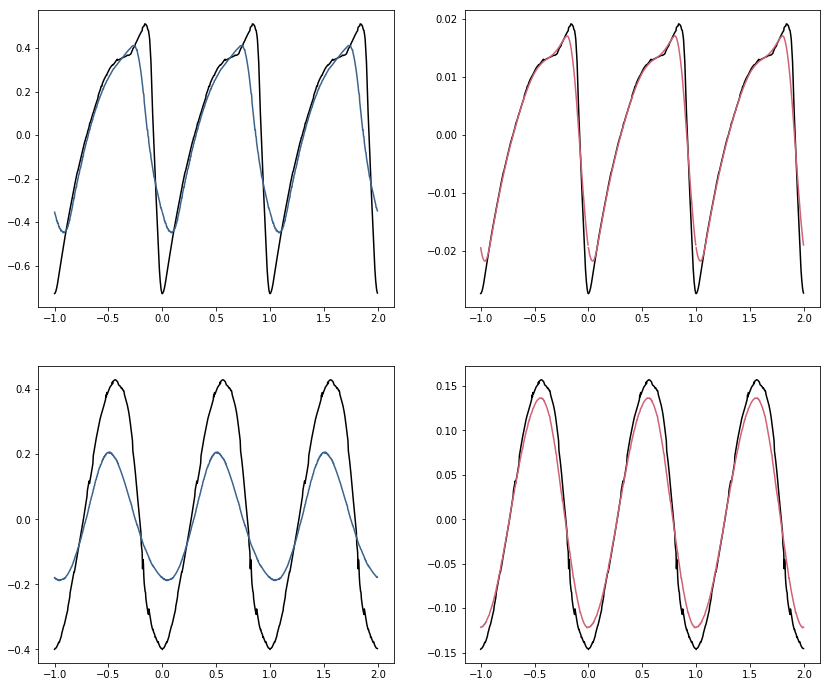

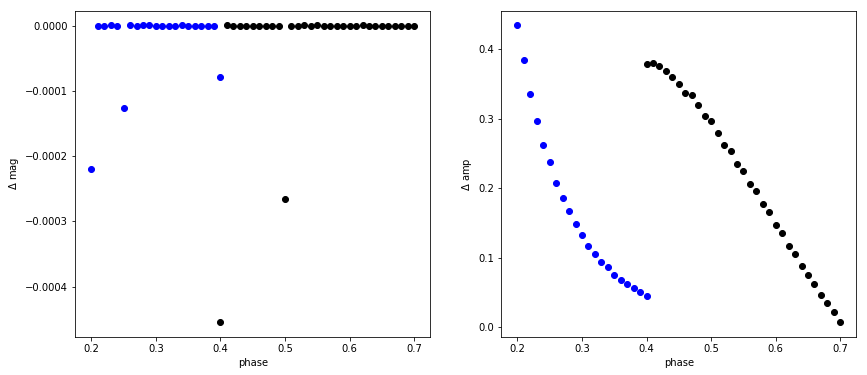

In [13]:
# Simulate the effect of long exposures on the observed shape of an RR Lyrae star 

exptime = 10800.0
periods_ab = np.linspace(0.4,0.7,31)
logP = np.log10(periods_ab)
amplitudes_ab = -2.627 - 22.046*logP - 30.876*logP**2

periods_c = np.linspace(0.2,0.4,21)
logP = np.log10(periods_c)
amplitudes_c = -0.395-1.764*logP

print amplitudes_ab[0], amplitudes_ab[-1], amplitudes_c[0], amplitudes_c[-1]

fig1 = plt.figure(figsize=(14,12))
ax1 = fig1.add_subplot(221)
ax2 = fig1.add_subplot(222)
ax3 = fig1.add_subplot(223)
ax4 = fig1.add_subplot(224)
rrlyrae.plot_rrlyrae_template(amplitude=amplitudes_ab[0], band='V', mode='ab', plt_axes=ax1)
rrlyrae.plot_rrlyrae_template(amplitude=amplitudes_ab[0], band='V', mode='ab', plt_axes=ax1, x_offset=-1.0)
rrlyrae.plot_rrlyrae_template(amplitude=amplitudes_ab[0], band='V', mode='ab', plt_axes=ax1, x_offset=1.0)
ph, m, delta_a, delta_m = rrlyrae.simulate_exposure_time(exptime, periods_ab[0], amplitudes_ab[0], mode='ab')
ax1.plot(ph, m, color='xkcd:denim')
ax1.plot(ph-1.0, m, color='xkcd:denim')
ax1.plot(ph+1.0, m, color='xkcd:denim')
rrlyrae.plot_rrlyrae_template(amplitude=amplitudes_ab[-1], band='V', mode='ab', plt_axes=ax2)
rrlyrae.plot_rrlyrae_template(amplitude=amplitudes_ab[-1], band='V', mode='ab', plt_axes=ax2, x_offset=-1.0)
rrlyrae.plot_rrlyrae_template(amplitude=amplitudes_ab[-1], band='V', mode='ab', plt_axes=ax2, x_offset=1.0)
ph, m, delta_a, delta_m = rrlyrae.simulate_exposure_time(exptime, periods_ab[-1], amplitudes_ab[-1], mode='ab')
ax2.plot(ph, m, color='xkcd:rose')
ax2.plot(ph-1.0, m, color='xkcd:rose')
ax2.plot(ph+1.0, m, color='xkcd:rose')

rrlyrae.plot_rrlyrae_template(amplitude=amplitudes_c[0], band='V', mode='c', plt_axes=ax3)
rrlyrae.plot_rrlyrae_template(amplitude=amplitudes_c[0], band='V', mode='c', plt_axes=ax3, x_offset=-1.0)
rrlyrae.plot_rrlyrae_template(amplitude=amplitudes_c[0], band='V', mode='c', plt_axes=ax3, x_offset=1.0)
ph, m, delta_a, delta_m = rrlyrae.simulate_exposure_time(exptime, periods_c[0], amplitudes_c[0], mode='c')
ax3.plot(ph, m, color='xkcd:denim')
ax3.plot(ph-1.0, m, color='xkcd:denim')
ax3.plot(ph+1.0, m, color='xkcd:denim')
rrlyrae.plot_rrlyrae_template(amplitude=amplitudes_c[-1], band='V', mode='c', plt_axes=ax4)
rrlyrae.plot_rrlyrae_template(amplitude=amplitudes_c[-1], band='V', mode='c', plt_axes=ax4, x_offset=-1.0)
rrlyrae.plot_rrlyrae_template(amplitude=amplitudes_c[-1], band='V', mode='c', plt_axes=ax4, x_offset=1.0)
ph, m, delta_a, delta_m = rrlyrae.simulate_exposure_time(exptime, periods_c[-1], amplitudes_c[-1], mode='c')
ax4.plot(ph, m, color='xkcd:rose')
ax4.plot(ph-1.0, m, color='xkcd:rose')
ax4.plot(ph+1.0, m, color='xkcd:rose')



fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xlabel('phase')
ax1.set_ylabel('$\Delta$ mag')
ax2.set_xlabel('phase')
ax2.set_ylabel('$\Delta$ amp')
for p, a in zip(periods_ab, amplitudes_ab):
    ph, m, delta_a, delta_m = rrlyrae.simulate_exposure_time(exptime, p, a, mode='ab')
    ax1.plot(p, delta_m, 'ko')
    ax2.plot(p, delta_a, 'ko')


for p, a in zip(periods_c, amplitudes_c):
    ph, m, delta_a, delta_m = rrlyrae.simulate_exposure_time(exptime, p, a, mode='c')
    ax1.plot(p, delta_m, 'bo')
    ax2.plot(p, delta_a, 'bo')

plt.show()

In [3]:
from astropy.io import fits
c = fits.open('amplitude_ratios.fits')
temp = c[1].data
cols = c[1].columns
print cols 


ColDefs(
    name = 'TYPE'; format = '4A'
    name = 'TYPE_FLG'; format = 'I'
    name = 'MAG'; format = '5A'
    name = 'MAG_IND'; format = 'I'
    name = 'AMPS'; format = '10E'
    name = 'SAMPS'; format = '10E'
    name = 'EAMPS'; format = '10E'
    name = 'AMPS_FLG'; format = '10I'
    name = 'NAMPS'; format = '10I'
)


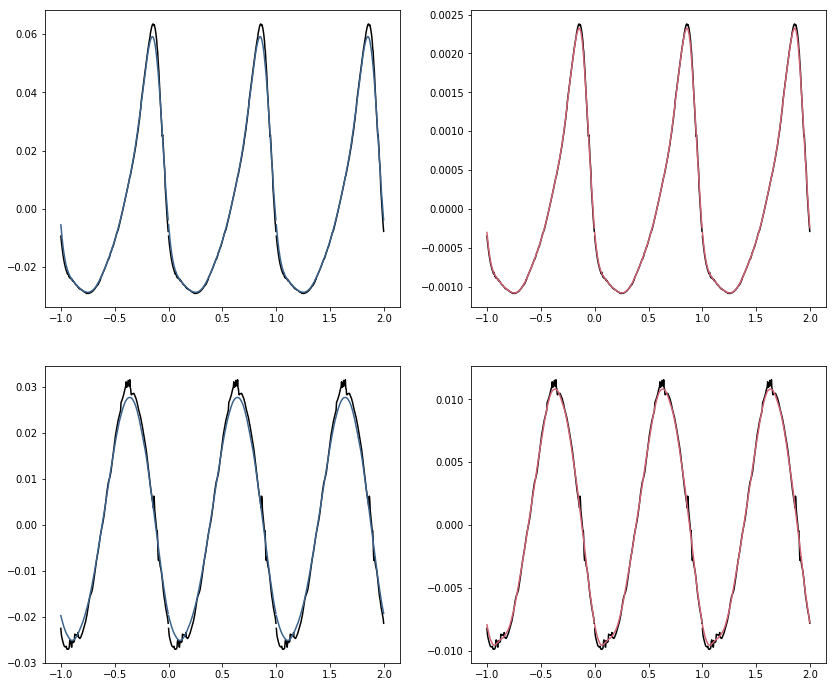

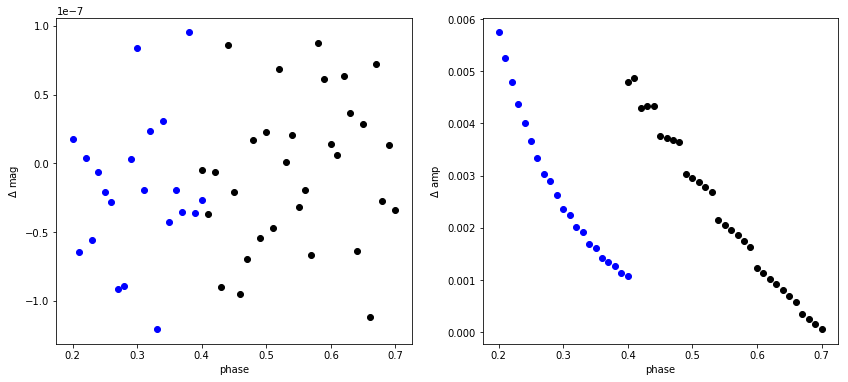

In [21]:
exptime = 3600.0
amp_ratio = temp['amps'][9,2]
amplitudes_ab = amplitudes_ab*amp_ratio
amplitudes_c = amplitudes_c*amp_ratio

fig1 = plt.figure(figsize=(14,12))
ax1 = fig1.add_subplot(221)
ax2 = fig1.add_subplot(222)
ax3 = fig1.add_subplot(223)
ax4 = fig1.add_subplot(224)
rrlyrae.plot_rrlyrae_template(amplitude=amplitudes_ab[0], band='[3.6]', mode='ab', plt_axes=ax1)
rrlyrae.plot_rrlyrae_template(amplitude=amplitudes_ab[0], band='[3.6]', mode='ab', plt_axes=ax1, x_offset=-1.0)
rrlyrae.plot_rrlyrae_template(amplitude=amplitudes_ab[0], band='[3.6]', mode='ab', plt_axes=ax1, x_offset=1.0)
ph, m, delta_a, delta_m = rrlyrae.simulate_exposure_time(exptime, periods_ab[0], amplitudes_ab[0], mode='ab', band='[3.6]')
ax1.plot(ph, m, color='xkcd:denim')
ax1.plot(ph-1.0, m, color='xkcd:denim')
ax1.plot(ph+1.0, m, color='xkcd:denim')
rrlyrae.plot_rrlyrae_template(amplitude=amplitudes_ab[-1], band='[3.6]', mode='ab', plt_axes=ax2)
rrlyrae.plot_rrlyrae_template(amplitude=amplitudes_ab[-1], band='[3.6]', mode='ab', plt_axes=ax2, x_offset=-1.0)
rrlyrae.plot_rrlyrae_template(amplitude=amplitudes_ab[-1], band='[3.6]', mode='ab', plt_axes=ax2, x_offset=1.0)
ph, m, delta_a, delta_m = rrlyrae.simulate_exposure_time(exptime, periods_ab[-1], amplitudes_ab[-1], mode='ab', band='[3.6]')
ax2.plot(ph, m, color='xkcd:rose')
ax2.plot(ph-1.0, m, color='xkcd:rose')
ax2.plot(ph+1.0, m, color='xkcd:rose')

rrlyrae.plot_rrlyrae_template(amplitude=amplitudes_c[0], band='[3.6]', mode='c', plt_axes=ax3)
rrlyrae.plot_rrlyrae_template(amplitude=amplitudes_c[0], band='[3.6]', mode='c', plt_axes=ax3, x_offset=-1.0)
rrlyrae.plot_rrlyrae_template(amplitude=amplitudes_c[0], band='[3.6]', mode='c', plt_axes=ax3, x_offset=1.0)
ph, m, delta_a, delta_m = rrlyrae.simulate_exposure_time(exptime, periods_c[0], amplitudes_c[0], mode='c', band='[3.6]')
ax3.plot(ph, m, color='xkcd:denim')
ax3.plot(ph-1.0, m, color='xkcd:denim')
ax3.plot(ph+1.0, m, color='xkcd:denim')
rrlyrae.plot_rrlyrae_template(amplitude=amplitudes_c[-1], band='[3.6]', mode='c', plt_axes=ax4)
rrlyrae.plot_rrlyrae_template(amplitude=amplitudes_c[-1], band='[3.6]', mode='c', plt_axes=ax4, x_offset=-1.0)
rrlyrae.plot_rrlyrae_template(amplitude=amplitudes_c[-1], band='[3.6]', mode='c', plt_axes=ax4, x_offset=1.0)
ph, m, delta_a, delta_m = rrlyrae.simulate_exposure_time(exptime, periods_c[-1], amplitudes_c[-1], mode='c', band='[3.6]')
ax4.plot(ph, m, color='xkcd:rose')
ax4.plot(ph-1.0, m, color='xkcd:rose')
ax4.plot(ph+1.0, m, color='xkcd:rose')



fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xlabel('phase')
ax1.set_ylabel('$\Delta$ mag')
ax2.set_xlabel('phase')
ax2.set_ylabel('$\Delta$ amp')
for p, a in zip(periods_ab, amplitudes_ab):
    ph, m, delta_a, delta_m = rrlyrae.simulate_exposure_time(exptime, p, a, mode='ab', band='[3.6]')
    ax1.plot(p, delta_m, 'ko')
    ax2.plot(p, delta_a, 'ko')


for p, a in zip(periods_c, amplitudes_c):
    ph, m, delta_a, delta_m = rrlyrae.simulate_exposure_time(exptime, p, a, mode='c', band='[3.6]')
    ax1.plot(p, delta_m, 'bo')
    ax2.plot(p, delta_a, 'bo')

plt.show()
